# Project: Train a Quadcopter How to Fly

Design an agent to fly a quadcopter, and then train it using a reinforcement learning algorithm of your choice! 

Try to apply the techniques you have learnt, but also feel free to come up with innovative ideas and test them.

## Instructions

Take a look at the files in the directory to better understand the structure of the project. 

- `task.py`: Define your task (environment) in this file.
- `agents/`: Folder containing reinforcement learning agents.
    - `policy_search.py`: A sample agent has been provided here.
    - `agent.py`: Develop your agent here.
- `physics_sim.py`: This file contains the simulator for the quadcopter.  **DO NOT MODIFY THIS FILE**.

For this project, you will define your own task in `task.py`.  Although we have provided a example task to get you started, you are encouraged to change it.  Later in this notebook, you will learn more about how to amend this file.

You will also design a reinforcement learning agent in `agent.py` to complete your chosen task.  

You are welcome to create any additional files to help you to organize your code.  For instance, you may find it useful to define a `model.py` file defining any needed neural network architectures.

## Controlling the Quadcopter

We provide a sample agent in the code cell below to show you how to use the sim to control the quadcopter.  This agent is even simpler than the sample agent that you'll examine (in `agents/policy_search.py`) later in this notebook!

The agent controls the quadcopter by setting the revolutions per second on each of its four rotors.  The provided agent in the `Basic_Agent` class below always selects a random action for each of the four rotors.  These four speeds are returned by the `act` method as a list of four floating-point numbers.  

For this project, the agent that you will implement in `agents/agent.py` will have a far more intelligent method for selecting actions!

In [1]:
import random

class Basic_Agent():
    def __init__(self, task):
        self.task = task
    
    def act(self):
        new_thrust = random.gauss(450., 25.)
        return [new_thrust + random.gauss(0., 1.) for x in range(4)]

Run the code cell below to have the agent select actions to control the quadcopter.  

Feel free to change the provided values of `runtime`, `init_pose`, `init_velocities`, and `init_angle_velocities` below to change the starting conditions of the quadcopter.

The `labels` list below annotates statistics that are saved while running the simulation.  All of this information is saved in a text file `data.txt` and stored in the dictionary `results`.  

In [2]:
%load_ext autoreload
%autoreload 2

import csv
import numpy as np
from task import Task

# Modify the values below to give the quadcopter a different starting position.
runtime = 5.                                     # time limit of the episode
init_pose = np.array([0., 0., 10., 0., 0., 0.])  # initial pose
init_velocities = np.array([0., 0., 0.])         # initial velocities
init_angle_velocities = np.array([0., 0., 0.])   # initial angle velocities
file_output = 'data.txt'                         # file name for saved results

# Setup
task = Task(init_pose, init_velocities, init_angle_velocities, runtime)
agent = Basic_Agent(task)
done = False
labels = ['time', 'x', 'y', 'z', 'phi', 'theta', 'psi', 'x_velocity',
          'y_velocity', 'z_velocity', 'phi_velocity', 'theta_velocity',
          'psi_velocity', 'rotor_speed1', 'rotor_speed2', 'rotor_speed3', 'rotor_speed4']
results = {x : [] for x in labels}

# Run the simulation, and save the results.
with open(file_output, 'w') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(labels)
    while True:
        rotor_speeds = agent.act()
        _, _, done = task.step(rotor_speeds)
        to_write = [task.sim.time] + list(task.sim.pose) + list(task.sim.v) + list(task.sim.angular_v) + list(rotor_speeds)
        for ii in range(len(labels)):
            results[labels[ii]].append(to_write[ii])
        writer.writerow(to_write)
        if done:
            break

Run the code cell below to visualize how the position of the quadcopter evolved during the simulation.

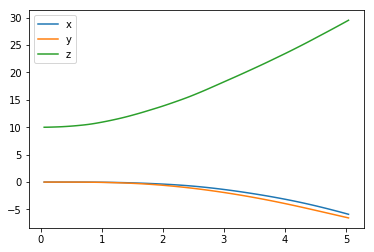

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(results['time'], results['x'], label='x')
plt.plot(results['time'], results['y'], label='y')
plt.plot(results['time'], results['z'], label='z')
plt.legend()
_ = plt.ylim()

The next code cell visualizes the velocity of the quadcopter.

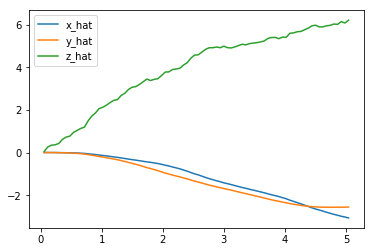

In [4]:
plt.plot(results['time'], results['x_velocity'], label='x_hat')
plt.plot(results['time'], results['y_velocity'], label='y_hat')
plt.plot(results['time'], results['z_velocity'], label='z_hat')
plt.legend()
_ = plt.ylim()

Next, you can plot the Euler angles (the rotation of the quadcopter over the $x$-, $y$-, and $z$-axes),

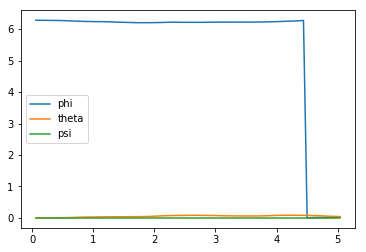

In [5]:
plt.plot(results['time'], results['phi'], label='phi')
plt.plot(results['time'], results['theta'], label='theta')
plt.plot(results['time'], results['psi'], label='psi')
plt.legend()
_ = plt.ylim()

before plotting the velocities (in radians per second) corresponding to each of the Euler angles.

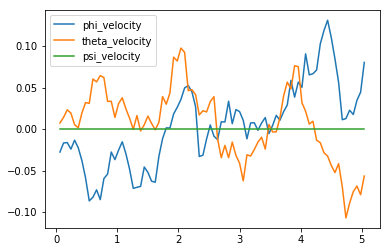

In [6]:
plt.plot(results['time'], results['phi_velocity'], label='phi_velocity')
plt.plot(results['time'], results['theta_velocity'], label='theta_velocity')
plt.plot(results['time'], results['psi_velocity'], label='psi_velocity')
plt.legend()
_ = plt.ylim()

Finally, you can use the code cell below to print the agent's choice of actions.  

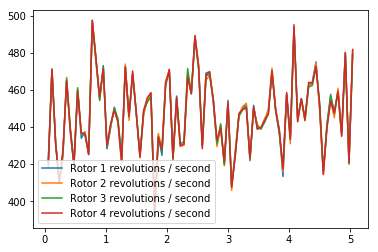

In [7]:
plt.plot(results['time'], results['rotor_speed1'], label='Rotor 1 revolutions / second')
plt.plot(results['time'], results['rotor_speed2'], label='Rotor 2 revolutions / second')
plt.plot(results['time'], results['rotor_speed3'], label='Rotor 3 revolutions / second')
plt.plot(results['time'], results['rotor_speed4'], label='Rotor 4 revolutions / second')
plt.legend()
_ = plt.ylim()

When specifying a task, you will derive the environment state from the simulator.  Run the code cell below to print the values of the following variables at the end of the simulation:
- `task.sim.pose` (the position of the quadcopter in ($x,y,z$) dimensions and the Euler angles),
- `task.sim.v` (the velocity of the quadcopter in ($x,y,z$) dimensions), and
- `task.sim.angular_v` (radians/second for each of the three Euler angles).

In [8]:
# the pose, velocity, and angular velocity of the quadcopter at the end of the episode
print(task.sim.pose)
print(task.sim.v)
print(task.sim.angular_v)

[-5.87606262e+00 -6.53807382e+00  2.95225536e+01  2.41031028e-02
  4.16491372e-02  0.00000000e+00]
[-3.06655946 -2.55720632  6.20067429]
[ 0.08030522 -0.05656089  0.        ]


In the sample task in `task.py`, we use the 6-dimensional pose of the quadcopter to construct the state of the environment at each timestep.  However, when amending the task for your purposes, you are welcome to expand the size of the state vector by including the velocity information.  You can use any combination of the pose, velocity, and angular velocity - feel free to tinker here, and construct the state to suit your task.

## The Task

A sample task has been provided for you in `task.py`.  Open this file in a new window now. 

The `__init__()` method is used to initialize several variables that are needed to specify the task.  
- The simulator is initialized as an instance of the `PhysicsSim` class (from `physics_sim.py`).  
- Inspired by the methodology in the original DDPG paper, we make use of action repeats.  For each timestep of the agent, we step the simulation `action_repeats` timesteps.  If you are not familiar with action repeats, please read the **Results** section in [the DDPG paper](https://arxiv.org/abs/1509.02971).
- We set the number of elements in the state vector.  For the sample task, we only work with the 6-dimensional pose information.  To set the size of the state (`state_size`), we must take action repeats into account.  
- The environment will always have a 4-dimensional action space, with one entry for each rotor (`action_size=4`). You can set the minimum (`action_low`) and maximum (`action_high`) values of each entry here.
- The sample task in this provided file is for the agent to reach a target position.  We specify that target position as a variable.

The `reset()` method resets the simulator.  The agent should call this method every time the episode ends.  You can see an example of this in the code cell below.

The `step()` method is perhaps the most important.  It accepts the agent's choice of action `rotor_speeds`, which is used to prepare the next state to pass on to the agent.  Then, the reward is computed from `get_reward()`.  The episode is considered done if the time limit has been exceeded, or the quadcopter has travelled outside of the bounds of the simulation.

In the next section, you will learn how to test the performance of an agent on this task.

## The Agent

The sample agent given in `agents/policy_search.py` uses a very simplistic linear policy to directly compute the action vector as a dot product of the state vector and a matrix of weights. Then, it randomly perturbs the parameters by adding some Gaussian noise, to produce a different policy. Based on the average reward obtained in each episode (`score`), it keeps track of the best set of parameters found so far, how the score is changing, and accordingly tweaks a scaling factor to widen or tighten the noise.

Run the code cell below to see how the agent performs on the sample task.

In [1]:
import sys
import pandas as pd
from agents.policy_search import PolicySearch_Agent
from task import Task

num_episodes = 1000
target_pos = np.array([0., 0., 10.])
task = Task(target_pos=target_pos)
agent = PolicySearch_Agent(task) 

for i_episode in range(1, num_episodes+1):
    state = agent.reset_episode() # start a new episode
    while True:
        action = agent.act(state) 
        next_state, reward, done = task.step(action)
        agent.step(reward, done)
        state = next_state
        if done:
            print("\rEpisode = {:4d}, score = {:7.3f} (best = {:7.3f}), noise_scale = {}".format(
                i_episode, agent.score, agent.best_score, agent.noise_scale), end="")  # [debug]
            break
    sys.stdout.flush()

NameError: name 'np' is not defined

This agent should perform very poorly on this task.  And that's where you come in!

## Define the Task, Design the Agent, and Train Your Agent!

Amend `task.py` to specify a task of your choosing.  If you're unsure what kind of task to specify, you may like to teach your quadcopter to takeoff, hover in place, land softly, or reach a target pose.  

After specifying your task, use the sample agent in `agents/policy_search.py` as a template to define your own agent in `agents/agent.py`.  You can borrow whatever you need from the sample agent, including ideas on how you might modularize your code (using helper methods like `act()`, `learn()`, `reset_episode()`, etc.).

Note that it is **highly unlikely** that the first agent and task that you specify will learn well.  You will likely have to tweak various hyperparameters and the reward function for your task until you arrive at reasonably good behavior.

As you develop your agent, it's important to keep an eye on how it's performing. Use the code above as inspiration to build in a mechanism to log/save the total rewards obtained in each episode to file.  If the episode rewards are gradually increasing, this is an indication that your agent is learning.

In [1]:
import sys
import pandas as pd
import numpy as np
from agents.agent import DDPG
from hover import Task

num_episodes = 1000
target_pos = np.array([0., 0., 100.])
task = Task(target_pos=target_pos)
agent = DDPG(task)

best_score = -100000
results = {}

for i_episode in range(1, num_episodes+1):
    state = agent.reset_episode() # start a new episode
    score = 0
    while True:
        action = agent.act(state) 
        next_state, reward, done = task.step(action)
        agent.step(action, reward, next_state, done)
        state = next_state
        score += reward
        best_score = max(best_score , score)
        results[i_episode] = {'Episode': i_episode, 'Reward':score,'Action':action, 'Best_Score':best_score,
                                  'x':task.sim.pose[0], 'y':task.sim.pose[1],'z':task.sim.pose[2]}
        if done:
            print("\rEpisode = {:4d}, score = {:7.3f} (best = {:7.3f}), (x = {:7.3f}, y = {:7.3f}, z = {:7.3f})".format(
                i_episode, score, best_score, task.sim.pose[0], task.sim.pose[1], task.sim.pose[2]), end="")
            break
    sys.stdout.flush()

Using TensorFlow backend.


Episode = 1000, score =  19.687 (best = 241.107), (x = -27.308, y =   2.098, z =   0.000))

In [2]:
results = pd.DataFrame.from_dict(results, orient='index')
results.tail(20)

,Episode,Reward,Action,Best_Score,x,y,z
981,981,-121.353380,"[899.7673457157398, 0.11291177569796862, 899.6...",241.10676,-7.019866,-0.014465,0.000000
982,982,-121.350547,"[899.5500149978975, 0.09109274414107296, 899.1...",241.10676,-7.038457,-0.009735,0.000000
983,983,-21.345670,"[899.4717490997543, 0.14733246988346343, 899.5...",241.10676,-7.015120,0.001895,0.000000
984,984,-21.336503,"[899.5370668217557, 0.05911279794138613, 900.1...",241.10676,-6.927902,-0.032477,0.000000
985,985,-21.341825,"[900.3098028389994, 0.9162429763195424, 900.05...",241.10676,-6.975399,-0.001480,0.000000
986,986,-21.345290,"[900.5556073934246, -0.0036625061975916317, 89...",241.10676,-7.016905,-0.002093,0.000000
987,987,-43.053426,"[900.0831722341431, 0.3937072353798808, 900.19...",241.10676,-12.988318,-0.011117,0.000000
988,988,236.905972,"[900.6407989006063, 899.6702783741297, 900.155...",241.10676,-44.717951,-41.065121,117.351352
989,989,239.104921,"[900.2942209724033, 900.1339516277244, 899.696...",241.10676,12.220091,-45.367192,125.278278
990,990,238.817295,"[898.9432526954637, 899.6755019693092, 899.590...",241.10676,-40.811269,-0.647113,129.856513


In [3]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

print(f'Average final x position for last 100 episodes: {results["x"][-100:].mean()}'+str())
print(f'Average final y position for last 100 episodes: {results["y"][-100:].mean()}'+str())
print(f'Average final z position for last 100 episodes: {results["z"][-100:].mean()}'+str())

Average final x position for last 100 episodes: -8.463564325976167
Average final y position for last 100 episodes: -5.03902666706371
Average final z position for last 100 episodes: 71.94284399403469


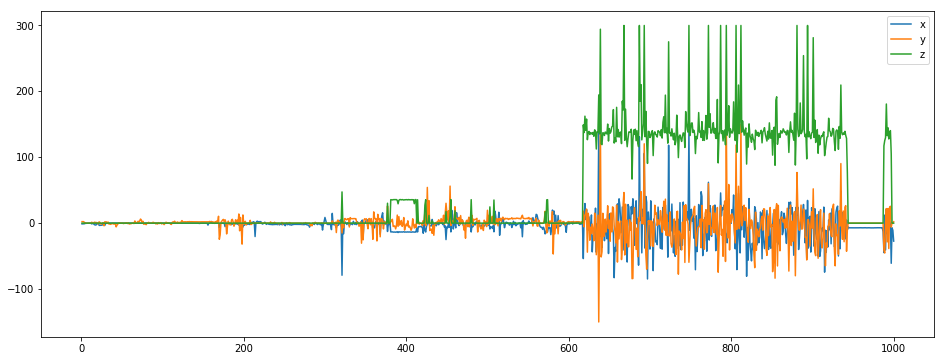

In [4]:
plt.figure(figsize=(16,6))
plt.plot(results['Episode'], results['x'], label='x')
plt.plot(results['Episode'], results['y'], label='y')
plt.plot(results['Episode'], results['z'], label='z')
plt.legend()

(0, 200)

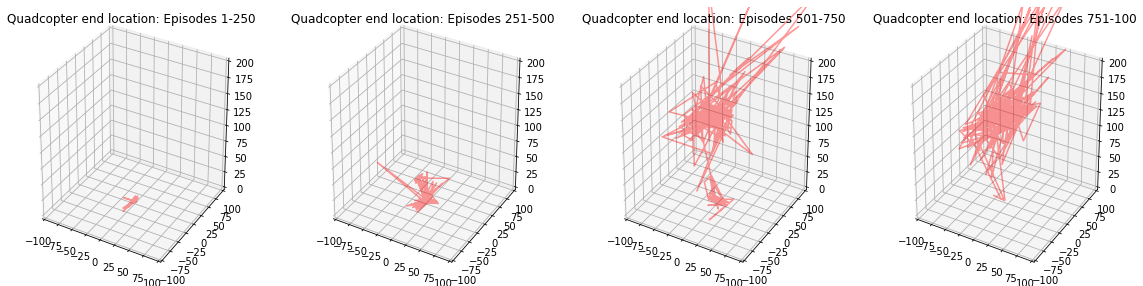

In [5]:
# This visualization code was adapted from
# https://github.com/sozker/Train-a-Quadcopter-How-to-Fly/blob/master/Quadcopter_Project.ipynb

fig = plt.figure(figsize=(20,5))

ax1 = fig.add_subplot(1, 4, 1, projection='3d')
results250 = results[results['Episode']<=250]
ax1.plot3D(results250['x'], results250['y'], results250['z'], alpha=0.4, color='red')
ax1.set_title("Quadcopter end location: Episodes 1-250")
ax1.set_xlim([-100, 100])
ax1.set_ylim([-100, 100])
ax1.set_zlim([0, 200])

ax2 = fig.add_subplot(1, 4, 2, projection='3d')
results500 = results[(results['Episode']>250) & (results['Episode']<=500)]
ax2.plot3D(results500['x'], results500['y'], results500['z'], alpha=0.4, color='red')
ax2.set_title("Quadcopter end location: Episodes 251-500")
ax2.set_xlim([-100, 100])
ax2.set_ylim([-100, 100])
ax2.set_zlim([0, 200])

ax3 = fig.add_subplot(1, 4, 3, projection='3d')
results750 = results[(results['Episode']>500) & (results['Episode']<=750)]
ax3.plot3D(results750['x'], results750['y'], results750['z'], alpha=0.4, color='red')
ax3.set_title("Quadcopter end location: Episodes 501-750")
ax3.set_xlim([-100, 100])
ax3.set_ylim([-100, 100])
ax3.set_zlim([0, 200])

ax4 = fig.add_subplot(1, 4, 4, projection='3d')
results1000 = results[results['Episode']>750]
ax4.plot3D(results1000['x'], results1000['y'], results1000['z'], alpha=0.4, color='red')
ax4.set_title("Quadcopter end location: Episodes 751-100")
ax4.set_xlim([-100, 100])
ax4.set_ylim([-100, 100])
ax4.set_zlim([0, 200])

## Plot the Rewards

Once you are satisfied with your performance, plot the episode rewards, either from a single run, or averaged over multiple runs. 

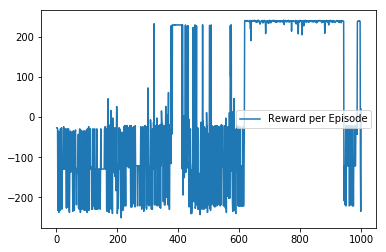

In [6]:
plt.plot(results['Episode'], results['Reward'], label='Reward per Episode')
plt.legend()

## Performance

In [7]:
%load_ext autoreload
%autoreload 2

# Modify the values below to give the quadcopter a different starting position.
runtime = 1000.                                  # time limit of the episode
init_pose = np.array([0., 0., 10., 0., 0., 0.])  # initial pose
init_velocities = np.array([0., 0., 0.])         # initial velocities
init_angle_velocities = np.array([0., 0., 0.])   # initial angle velocities

# Setup
task = Task(init_pose, init_velocities, init_angle_velocities, runtime)
done = False
labels = ['time', 'x', 'y', 'z', 'phi', 'theta', 'psi', 'x_velocity',
          'y_velocity', 'z_velocity', 'phi_velocity', 'theta_velocity',
          'psi_velocity', 'rotor_speed1', 'rotor_speed2', 'rotor_speed3', 'rotor_speed4']
performance = {}

# Run the simulation
state = agent.reset_episode()
total_reward = 0
i = 0

while True:
    i += 1
    rotor_speeds = agent.act(state)
    next_state, reward, done = task.step(rotor_speeds)
    to_write = [task.sim.time] + list(task.sim.pose) + list(task.sim.v) + list(task.sim.angular_v) + list(rotor_speeds)
    performance[i] = {'Time': task.sim.time, 'x':task.sim.pose[0], 'y':task.sim.pose[1], 'z':task.sim.pose[2], 
                     'phi': task.sim.pose[3], 'theta': task.sim.pose[4], 'psi': task.sim.pose[5], 
                      'x_velocity': task.sim.v[0], 'y_velocity': task.sim.v[1], 
                      'z_velocity': task.sim.v[2], 'phi_velocity': task.sim.angular_v[0], 
                      'theta_velocity': task.sim.angular_v[1], 'psi_velocity': task.sim.angular_v[2], 
                      'rotor_speed1': rotor_speeds[0], 'rotor_speed2': rotor_speeds[1], 
                      'rotor_speed3': rotor_speeds[2], 'rotor_speed4': rotor_speeds[3]}
    total_reward += reward
    state = next_state
    if done:
        print(f"Total reward: {total_reward}")
        break

Total reward: 367.95174399082936


In [8]:
performance = pd.DataFrame.from_dict(performance, orient='index')
performance

,Time,x,y,z,phi,theta,psi,x_velocity,y_velocity,z_velocity,phi_velocity,theta_velocity,psi_velocity,rotor_speed1,rotor_speed2,rotor_speed3,rotor_speed4
1,0.06,3.185879e-07,-2.569426e-07,10.069961,6.283089,6.283055,0.0,0.000037,-0.000028,2.330376,-0.005018,-0.006912,0.0,900.023737,899.744024,900.214771,900.011780
2,0.12,2.083888e-05,-1.513109e-05,10.279082,6.282794,6.282351,0.0,0.000875,-0.000594,4.634039,-0.004705,-0.023747,0.0,900.108619,899.427311,900.264804,900.277569
3,0.18,1.672902e-04,-8.890687e-05,10.624848,6.282358,6.280753,0.0,0.004625,-0.002008,6.880872,-0.012974,-0.033145,0.0,899.911366,899.531130,900.634279,900.299887
4,0.24,6.770613e-04,-2.900813e-04,11.102967,6.281487,6.278513,0.0,0.013177,-0.005016,9.041970,-0.017777,-0.047379,0.0,900.042794,899.466585,900.293166,900.099048
5,0.30,1.882163e-03,-7.417447e-04,11.707614,6.280528,6.275537,0.0,0.028031,-0.010399,11.095339,-0.012627,-0.054448,0.0,900.197226,899.910921,900.028717,900.237401
6,0.36,4.190805e-03,-1.577927e-03,12.431750,6.279895,6.272337,0.0,0.049954,-0.017675,13.022553,-0.006718,-0.051195,0.0,900.019144,900.150546,900.273479,900.512739
7,0.42,8.007725e-03,-2.880095e-03,13.267345,6.279563,6.269311,0.0,0.078093,-0.025787,14.809107,-0.003231,-0.048970,0.0,899.817068,899.906952,900.428255,900.569485
8,0.48,1.366401e-02,-4.673960e-03,14.205734,6.279453,6.266720,0.0,0.111024,-0.033977,16.448272,0.000822,-0.033567,0.0,899.592375,900.216038,900.574306,900.738302
9,0.54,2.138417e-02,-6.947158e-03,15.237947,6.279457,6.264785,0.0,0.146538,-0.041705,17.936503,-0.001514,-0.029772,0.0,900.011634,900.165450,900.491494,900.396960
10,0.60,3.126964e-02,-9.668679e-03,16.354944,6.279153,6.263091,0.0,0.183058,-0.048983,19.274879,-0.013292,-0.025326,0.0,899.902092,900.082366,900.602493,900.125879


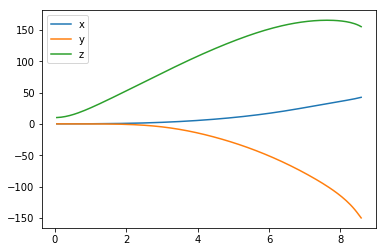

In [9]:
plt.plot(performance['Time'], performance['x'], label='x')
plt.plot(performance['Time'], performance['y'], label='y')
plt.plot(performance['Time'], performance['z'], label='z')
plt.legend()

## Reflections

**Question 1**: Describe the task that you specified in `task.py`.  How did you design the reward function?

**Answer**: I decided to teach the quadcopter how to hover at a set point.  Initially, I had it hover at position \[0, 0, 10\], but found that the quadcopoter has a significant amount of trouble achieving this.  I am not sure of the reason for this, but it's possible that in this case, the relative penalty for crashing (the quadcopter tended to crash at the end of every episode) is not very high relative to flying off, as the target position is not very high above the floor.  Changing the target position to \[0, 0, 100\] seemed to make the task easier.

I also attempted to modify the reward function in two ways: by applying a non-linear function (`tanh`) to bound the reward, and by decreasing and therefore bounding the relative penalty for mispositioning (from 0.3 to 0.1, 0.01, etc.).  Decreasing and bounding the penalty, down to 0.001, seemed to have the best effect on performance, and with the right learning algorithm, the quadcopter was able to fairly reliably learn to hover using this reward function.  Applying the non-linear function `tanh` did not have clear benefit at this point, and I discarded it:

`reward = 1 - 0.001*(abs(self.sim.pose[:3] - self.target_pos)).sum()`

In the future, I may want to revise this formula to particularly penalize crashing, assuming that hovering at a position other than intended is preferable to the drone setting down on the ground.  However, this may have unintended consequences.

**Question 2**: Discuss your agent briefly, using the following questions as a guide:

- What learning algorithm(s) did you try? What worked best for you?
- What was your final choice of hyperparameters (such as $\alpha$, $\gamma$, $\epsilon$, etc.)?
- What neural network architecture did you use (if any)? Specify layers, sizes, activation functions, etc.

**Answer**: I intially tried the default learning algorithm, attempting to modify only the reward function, which improved reward slightly, but did not teach the quadcopter how to fly.  I then used the learning algorithm recommended by Udacity (Deep Deterministic Policy Gradients; DDPG), initially with the default parameters and architecture.  Once I saw that this learning algorithm resulted in significant improvement in task-learning (given the right reward function, the quadcopter would eventually learn to hover, even if not at exactly the right position), I attempted to modify the architecture to either improve learning speed, improve performance, or decrease runtime (which had increased significantly, particularly when I increased layer sizes).

In the end, I did not modify the hyperparameters.  The parameters were set as follows: $\tau$ = 0.01; $\gamma$ = 0.99.

I modified the Neural Network architecture, as suggested, by increasing layer sizes (while at times decreasing the number of layers to increase speed), adding batch normalization to improve network performance and stability, and adding L2 regularizers to reduce overfitting.  In this case, I experimented, trading off performance vs. speed, until I arrived at a reasonable compromise.  The actor model had one dense hidden layer with 128 nodes, L2 regularization, batch normalization, and a ReLu activation function.  The critic model had two dense hiddern layers for the state and action pathways with 128 nodes each, L2 regularization, batch normalization, and a ReLu activation function.

**Question 3**: Using the episode rewards plot, discuss how the agent learned over time.

- Was it an easy task to learn or hard?
- Was there a gradual learning curve, or an aha moment?
- How good was the final performance of the agent? (e.g. mean rewards over the last 10 episodes)

**Answer**: This was a relatively difficult task to learn, and it took a lot of tweaking of the reward function and neural network architecture to reach the point where the quadcopter reliably learned to hover (and continue hovering) at or near the specified position.  (..........)

**Question 4**: Briefly summarize your experience working on this project. You can use the following prompts for ideas.

- What was the hardest part of the project? (e.g. getting started, plotting, specifying the task, etc.)
- Did you find anything interesting in how the quadcopter or your agent behaved?

**Answer**: The hardest part of this project was translating from the very complex, abstract, and rapidly presented information in the course to the task at hand.  Once I was able to map between the concepts I learned and the code I wanted to write, and started tweaking with the reward function and agent architecture and seeing results, it became easier.  However, I still do not feel that I fully grasp all of the issues at hand, and would need more time to get a good handle of how RL works.

I found it interesting that occasionally, I was able to get the quadcopter to reliably hover for an extended number of episodes, but then would see it appear to un-learn this behavior, and reliably crash at the end of the episode.  I also found it interesting, although unsurprising, that it was more difficult to get the quadcopter to hover relatively close to the floor.